In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
file_path = "C:/Users/Yi Yang/Documents/Dsci521/cleaned_vgames_data.csv" 
df = pd.read_csv(file_path)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Other_Sales_Ratio,Score_Difference,Total_Score,Game_Age,Platform_Publisher,Score_Percentage_Difference,Normalized_Critic_Score,Normalized_User_Score,Sales_Critic_Score_Ratio,Sales_User_Score_Ratio
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,0.102387,-4.000000,77.600000,17,Wii_Nintendo,-5.263158,0.741176,0.824742,1.085921,1.031625
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0.019135,-2.282783,69.880792,38,NES_Nintendo,-3.309931,0.658443,0.734541,0.583462,0.564768
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,0.092624,-1.000000,82.400000,15,Wii_Nintendo,-1.219512,0.811765,0.855670,0.433171,0.427952
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,0.090021,0.000000,80.000000,14,Wii_Nintendo,0.000000,0.788235,0.824742,0.409625,0.409625
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0.031878,-2.282783,69.880792,27,GB_Nintendo,-3.309931,0.658443,0.734541,0.454851,0.440278


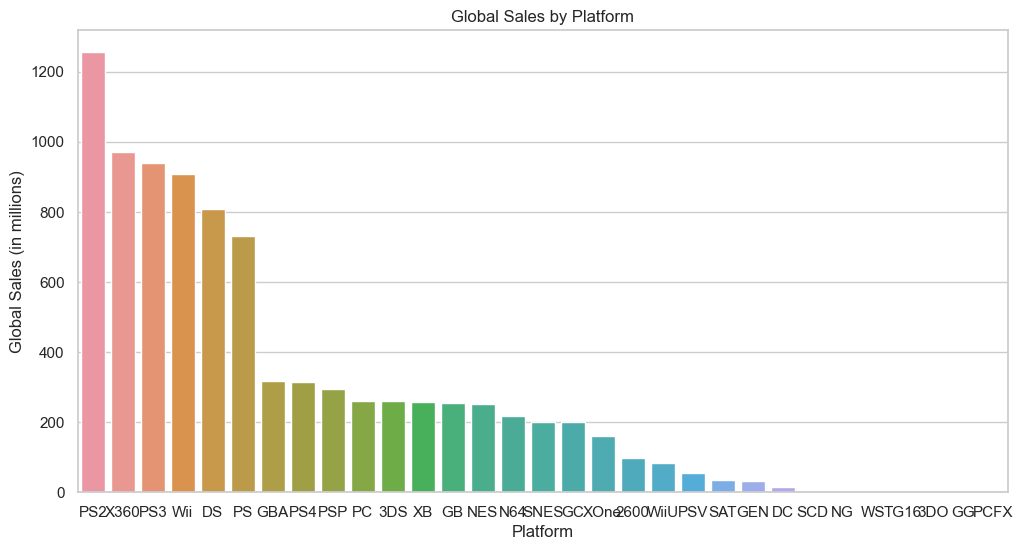

In [139]:
platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title("Global Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Global Sales (in millions)")
plt.show()

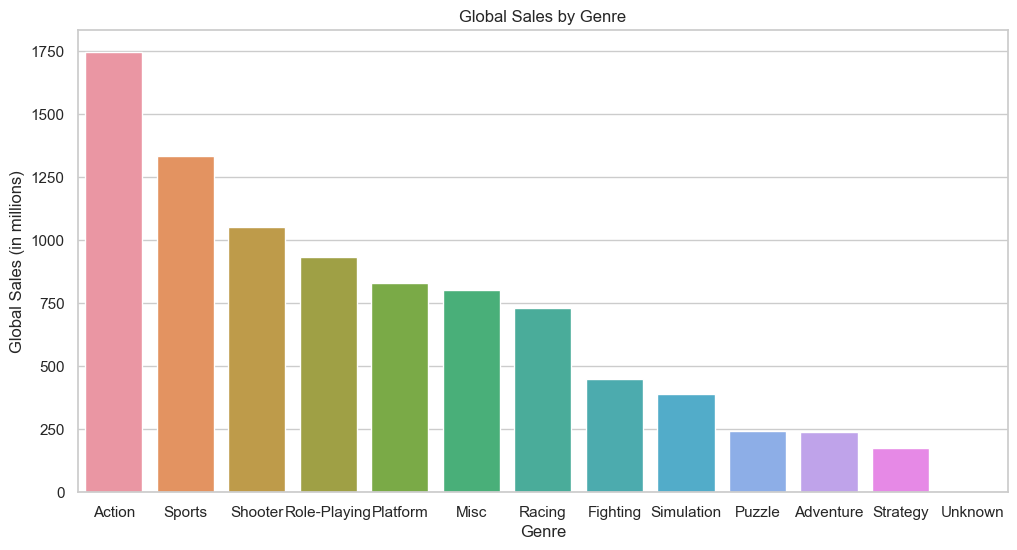

In [140]:
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title("Global Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Global Sales (in millions)")
plt.show()

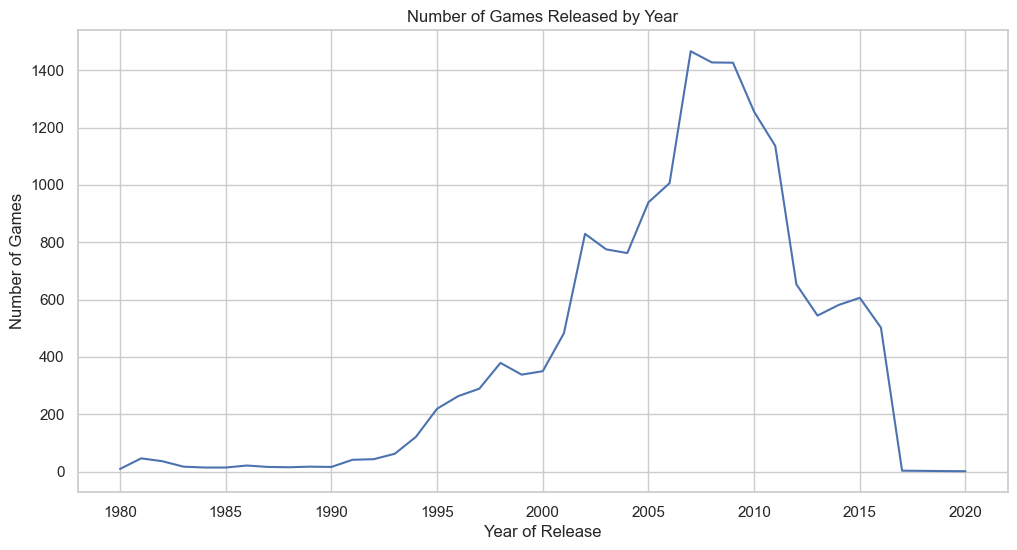

In [141]:
year_counts = df.groupby("Year_of_Release")["Name"].count()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Games Released by Year")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")
plt.show()

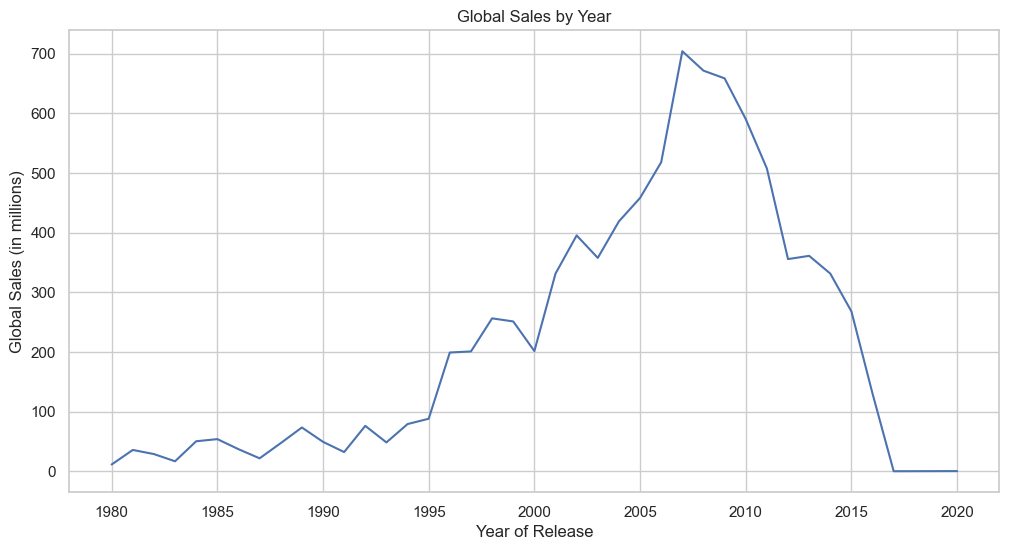

In [142]:
year_sales = df.groupby("Year_of_Release")["Global_Sales"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_sales.index, y=year_sales.values)
plt.title("Global Sales by Year")
plt.xlabel("Year of Release")
plt.ylabel("Global Sales (in millions)")
plt.show()

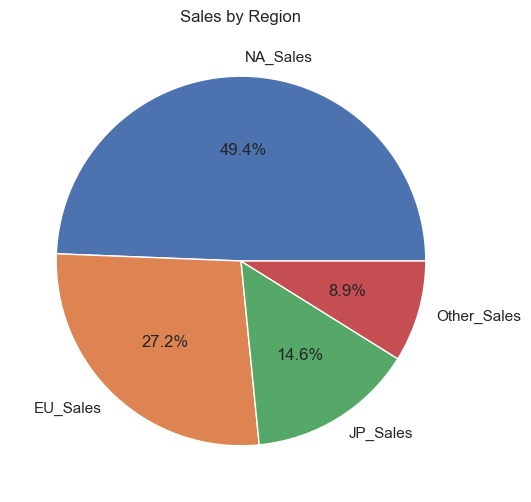

In [143]:
region_sales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
plt.figure(figsize=(6, 6))
plt.pie(region_sales, labels=region_sales.index, autopct="%1.1f%%")
plt.title("Sales by Region")
plt.show()


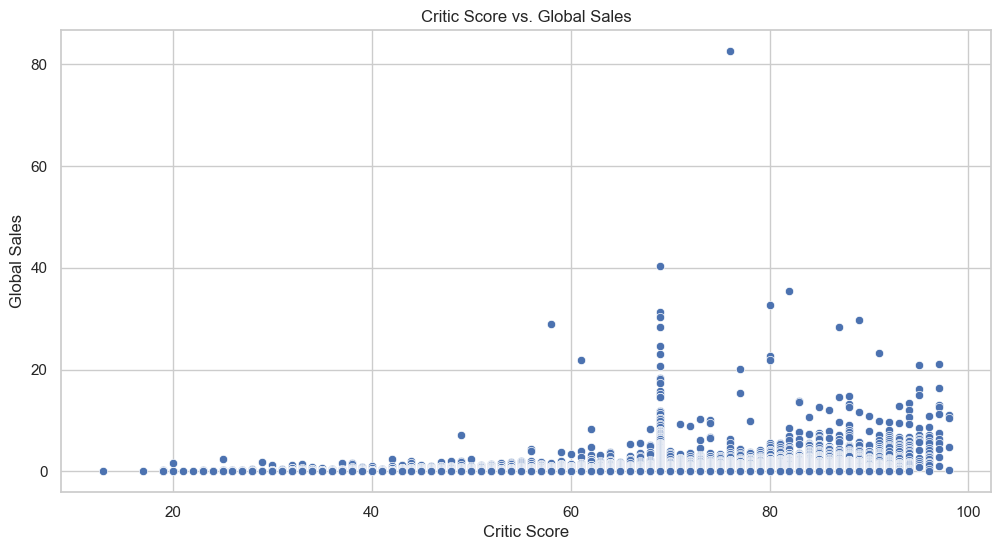

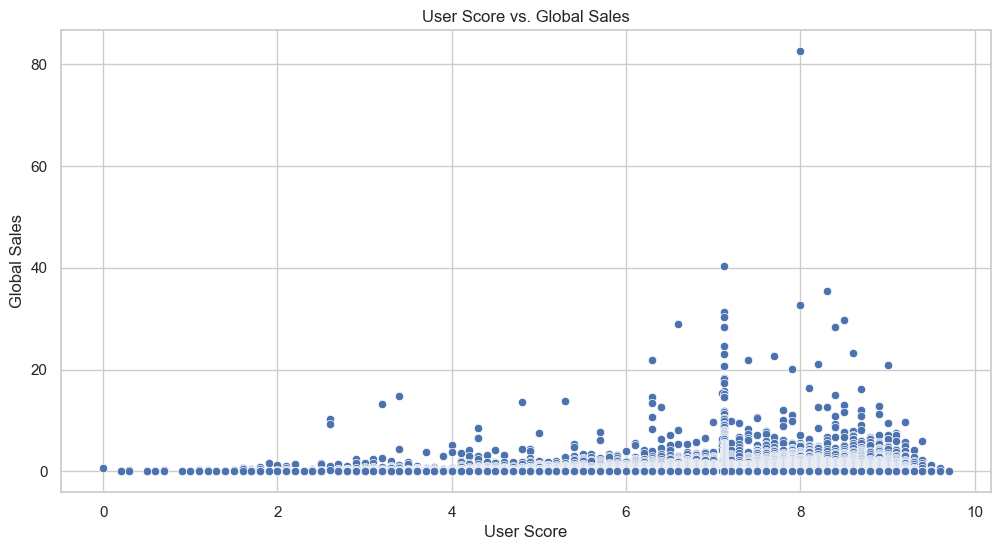

In [144]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Critic_Score', y='Global_Sales')
plt.title('Critic Score vs. Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='User_Score', y='Global_Sales')
plt.title('User Score vs. Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales')
plt.show()

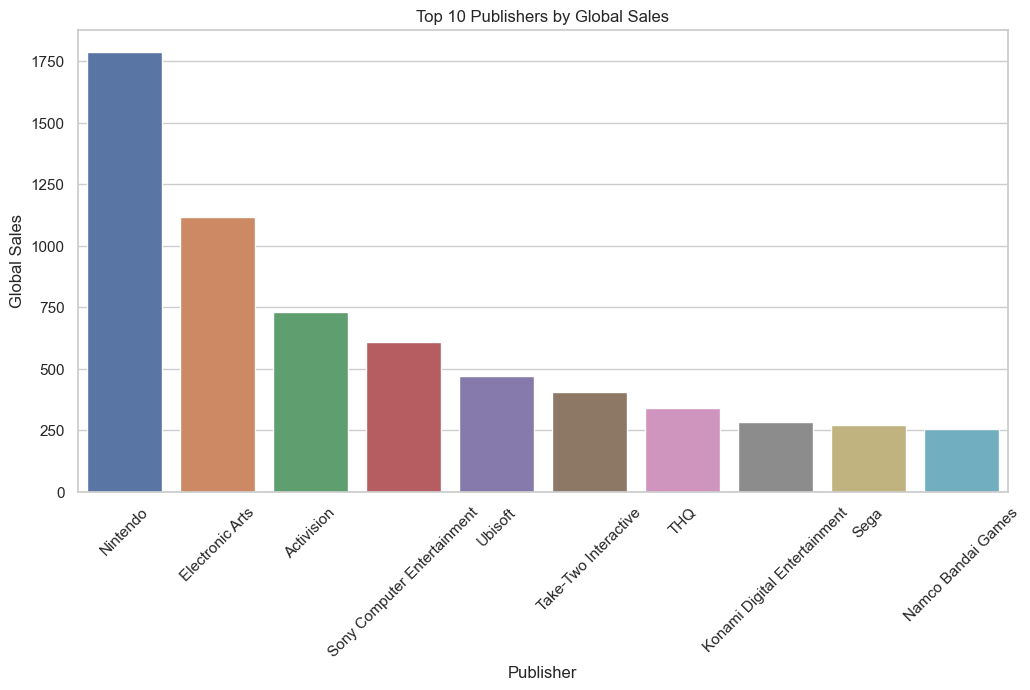

In [145]:
## Sales on top publisher
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

In [146]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'Unknown'], dtype=object)

In [147]:
col = ['Genre','Global_Sales']
df_genre = df[col].groupby('Genre').sum().sort_values('Global_Sales')
df_genre

,Global_Sales
Genre,
Unknown,2.42
Strategy,174.50
Adventure,237.69
Puzzle,243.02
Simulation,390.42
Fighting,447.48
Racing,728.90
Misc,803.18
Platform,828.08


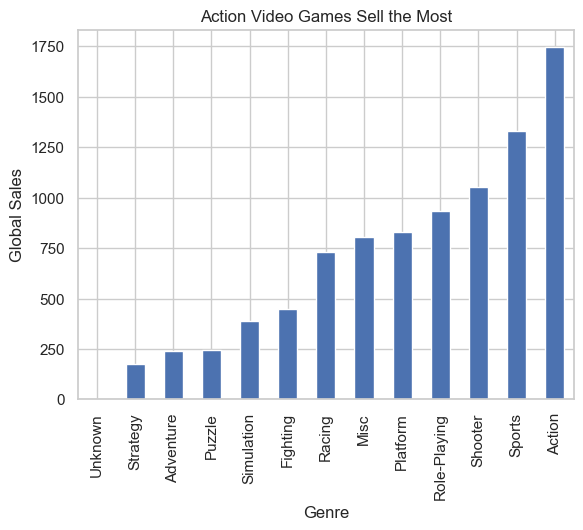

In [148]:
df_genre.plot(kind='bar', legend=False)
plt.ylabel('Global Sales')
plt.title('Action Video Games Sell the Most')
plt.show()

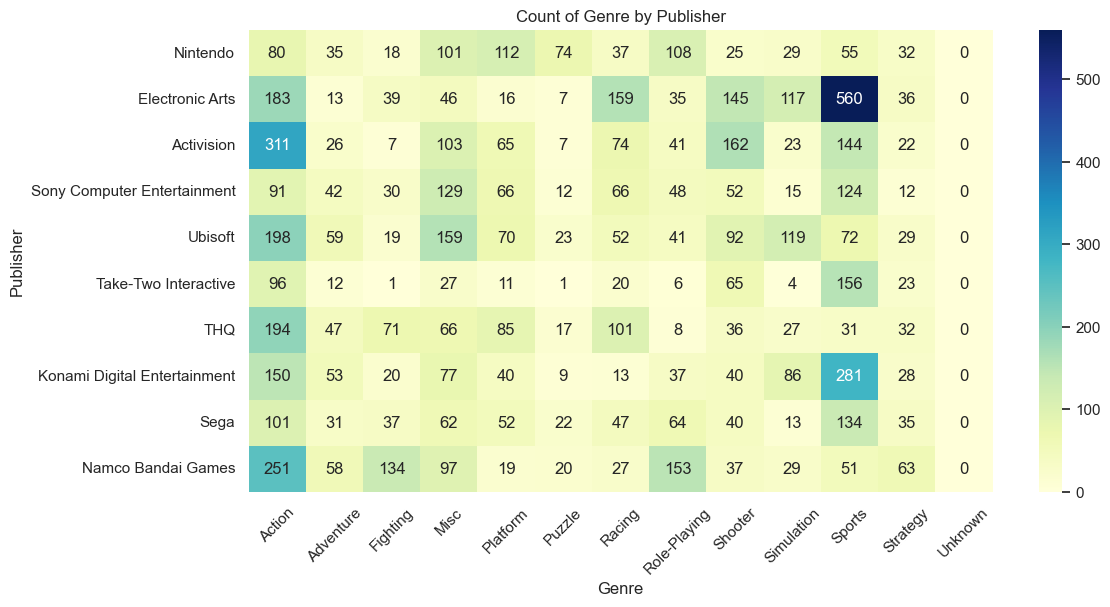

In [149]:
genre_by_publisher = df.groupby(['Publisher', 'Genre']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(genre_by_publisher.loc[top_publishers.index], cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Count of Genre by Publisher')
plt.xlabel('Genre')
plt.ylabel('Publisher')
plt.xticks(rotation=45)
plt.show()

In [150]:
top_publishers = df.Publisher.value_counts()
top_publishers.head(10), print("Amount of different publishers:", len(top_publishers))

Amount of different publishers: 581


(Electronic Arts                 1356
 Activision                       985
 Namco Bandai Games               939
 Ubisoft                          933
 Konami Digital Entertainment     834
 THQ                              715
 Nintendo                         706
 Sony Computer Entertainment      687
 Sega                             638
 Take-Two Interactive             422
 Name: Publisher, dtype: int64,
 None)

In [154]:
#storing the array of publisher names to a variable
top10_publishers = top_publishers.head(10).index.values

#filtered the dataframe by the top 10 publishers
df_top10 = df[df['Publisher'].isin(top10_publishers)]
df_top10.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Other_Sales_Ratio,Score_Difference,Total_Score,Game_Age,Platform_Publisher,Score_Percentage_Difference,Normalized_Critic_Score,Normalized_User_Score,Sales_Critic_Score_Ratio,Sales_User_Score_Ratio
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,0.102387,-4.000000,77.600000,17,Wii_Nintendo,-5.263158,0.741176,0.824742,1.085921,1.031625
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0.019135,-2.282783,69.880792,38,NES_Nintendo,-3.309931,0.658443,0.734541,0.583462,0.564768
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,0.092624,-1.000000,82.400000,15,Wii_Nintendo,-1.219512,0.811765,0.855670,0.433171,0.427952
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,0.090021,0.000000,80.000000,14,Wii_Nintendo,0.000000,0.788235,0.824742,0.409625,0.409625
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0.031878,-2.282783,69.880792,27,GB_Nintendo,-3.309931,0.658443,0.734541,0.454851,0.440278


In [155]:
col=['Publisher', 'Global_Sales']
top10 = df_top10[col].groupby('Publisher').sum().sort_values('Publisher')
top10

,Global_Sales
Publisher,
Activision,731.16
Electronic Arts,1116.96
Konami Digital Entertainment,282.39
Namco Bandai Games,254.62
Nintendo,1788.81
Sega,270.35
Sony Computer Entertainment,606.48
THQ,338.44
Take-Two Interactive,403.82


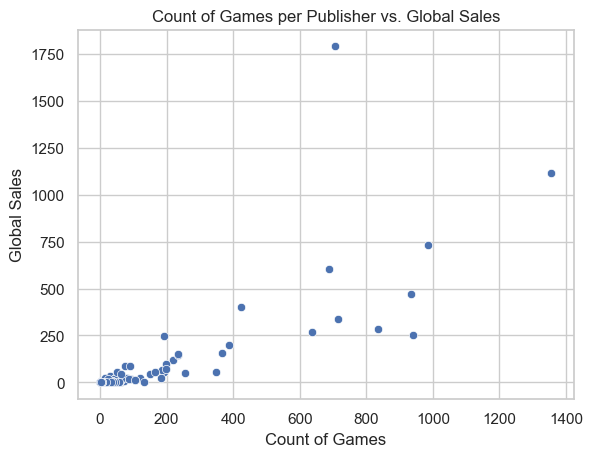

In [151]:
publisher_count = df['Publisher'].value_counts()
publisher_global_sales = df.groupby('Publisher')['Global_Sales'].sum()
publisher_df = pd.DataFrame({'Count': publisher_count, 'Global_Sales': publisher_global_sales})
sns.scatterplot(data=publisher_df, x='Count', y='Global_Sales')
plt.title('Count of Games per Publisher vs. Global Sales')
plt.xlabel('Count of Games')
plt.ylabel('Global Sales')
plt.show()

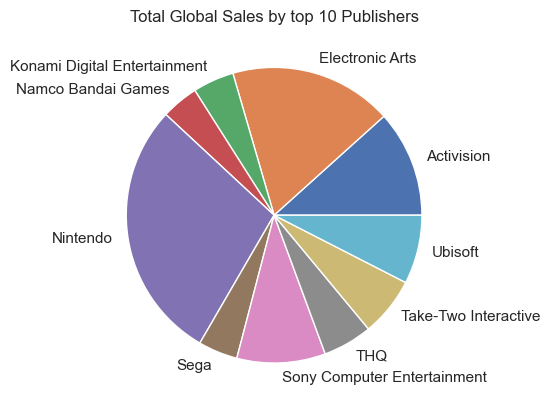

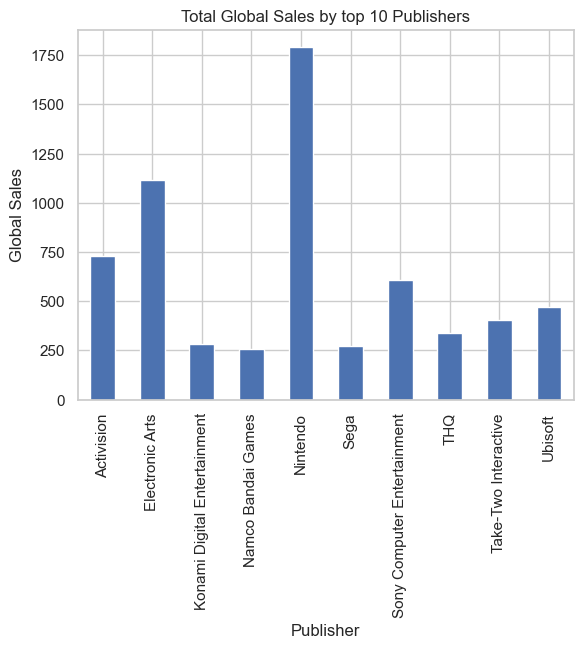

In [156]:
top10.plot.pie(y='Global_Sales', legend=False, title="Total Global Sales by top 10 Publishers")
plt.ylabel('')
plt.show()
top10.plot(kind='bar', title='Total Global Sales by top 10 Publishers', legend=False)
plt.ylabel('Global Sales')
plt.show()

In [160]:
top5_publishers = top_publishers.head(5).index.values
df_top5 = df[df.Publisher.isin(top5_publishers)]
col = ['Publisher', 'Genre']
genre_count = df_top5[col].groupby(['Publisher', 'Genre']).size()
genre_count.head(25)


Publisher                     Genre       
Activision                    Action          311
                              Adventure        26
                              Fighting          7
                              Misc            103
                              Platform         65
                              Puzzle            7
                              Racing           74
                              Role-Playing     41
                              Shooter         162
                              Simulation       23
                              Sports          144
                              Strategy         22
Electronic Arts               Action          183
                              Adventure        13
                              Fighting         39
                              Misc             46
                              Platform         16
                              Puzzle            7
                              Racing          159
       

In [161]:
genre_count_unstack = genre_count.unstack('Publisher')
genre_count_unstack

Publisher,Activision,Electronic Arts,Konami Digital Entertainment,Namco Bandai Games,Ubisoft
Genre,,,,,
Action,311,183,150,251,198
Adventure,26,13,53,58,59
Fighting,7,39,20,134,19
Misc,103,46,77,97,159
Platform,65,16,40,19,70
Puzzle,7,7,9,20,23
Racing,74,159,13,27,52
Role-Playing,41,35,37,153,41
Shooter,162,145,40,37,92


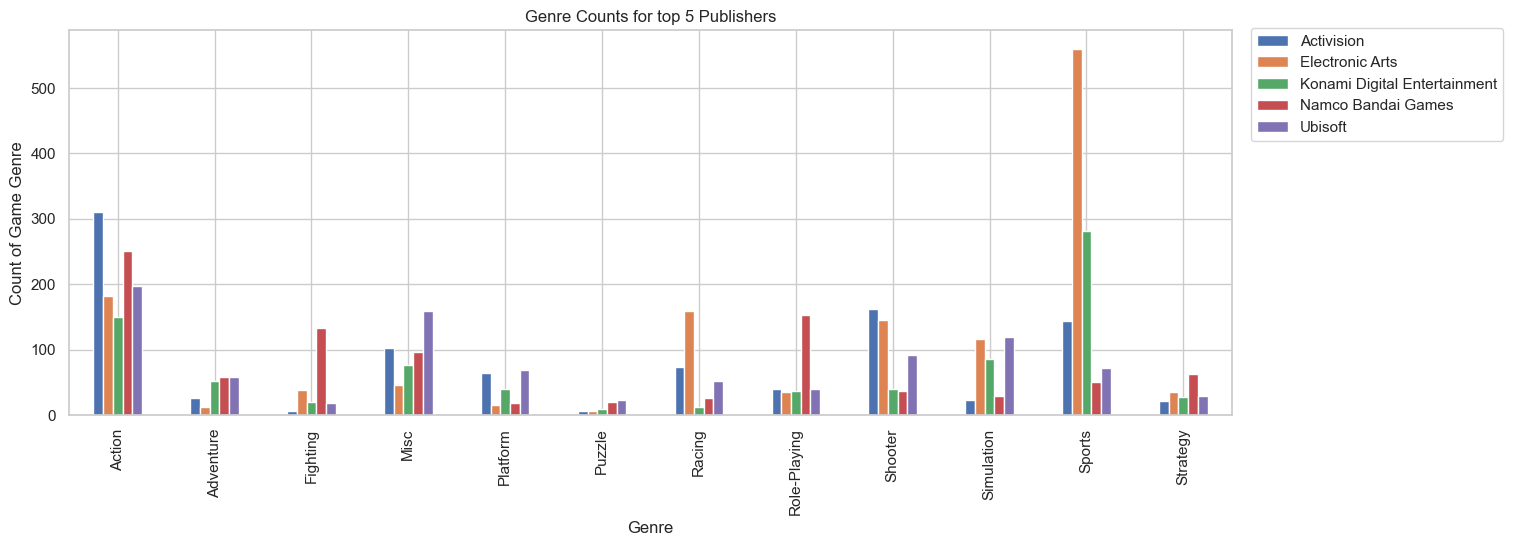

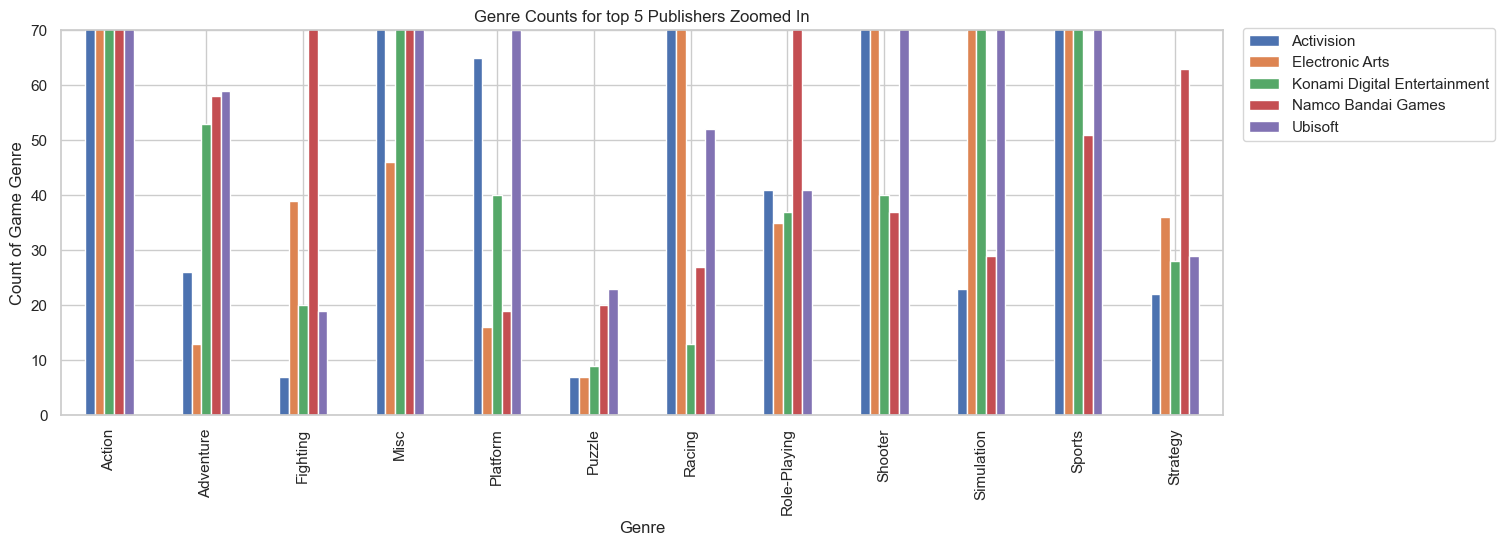

In [162]:
genre_count_unstack.plot(kind='bar', figsize=(15,5))
plt.title('Genre Counts for top 5 Publishers')
plt.legend(loc='upper right', bbox_to_anchor=(1.24, 1.025))
plt.ylabel('Count of Game Genre')
plt.show()


genre_count_unstack.plot(kind='bar', figsize=(15,5))
plt.title('Genre Counts for top 5 Publishers Zoomed In')
plt.legend(loc='upper right', bbox_to_anchor=(1.24, 1.025))
plt.ylabel('Count of Game Genre')
plt.ylim(0, 70)
plt.show()

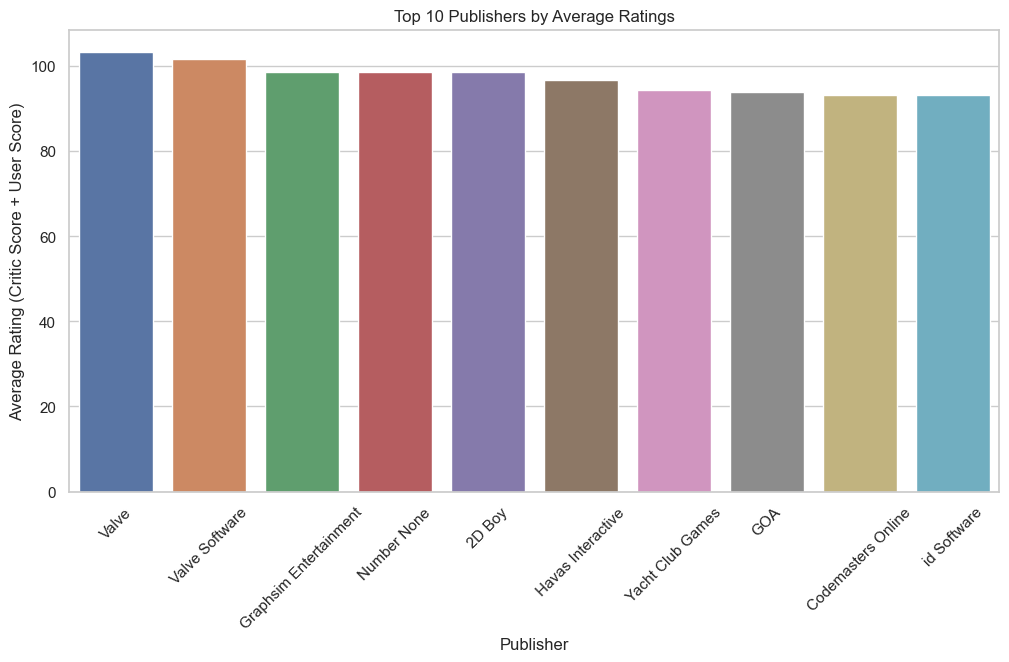

In [152]:
avg_rating_by_publisher = df.groupby('Publisher')[['Critic_Score', 'User_Score']].mean()
avg_rating_by_publisher['Total_Rating'] = avg_rating_by_publisher['Critic_Score'] + avg_rating_by_publisher['User_Score']
top_rating_publishers = avg_rating_by_publisher.sort_values(by='Total_Rating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rating_publishers.index, y=top_rating_publishers['Total_Rating'])
plt.title('Top 10 Publishers by Average Ratings')
plt.xlabel('Publisher')
plt.ylabel('Average Rating (Critic Score + User Score)')
plt.xticks(rotation=45)
plt.show()


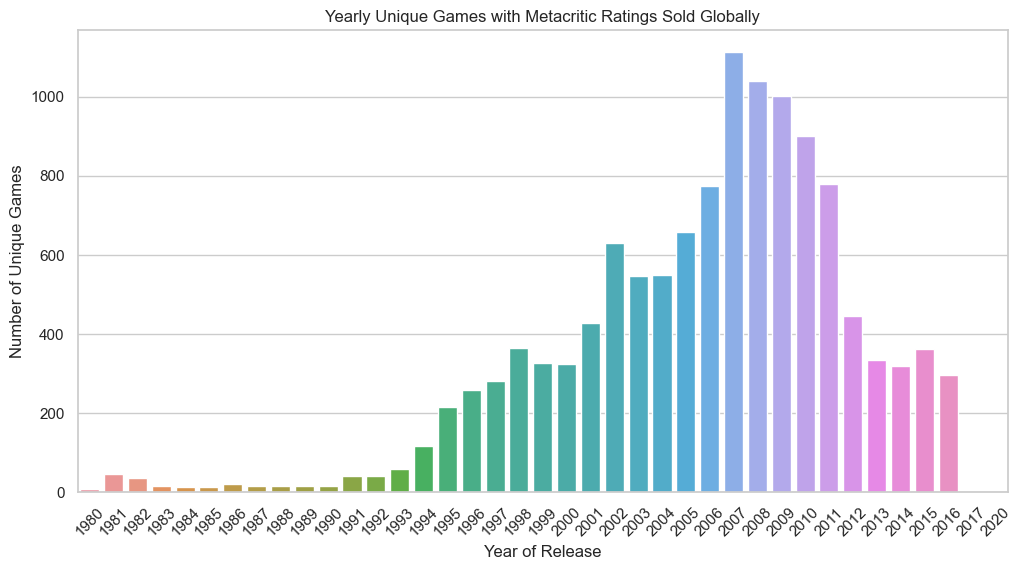

In [153]:
unique_games_with_ratings = df[df['Critic_Score'].notnull()]
yearly_unique_games = unique_games_with_ratings.groupby('Year_of_Release')['Name'].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_unique_games.index, y=yearly_unique_games.values)
plt.title('Yearly Unique Games with Metacritic Ratings Sold Globally')
plt.xlabel('Year of Release')
plt.ylabel('Number of Unique Games')
plt.xticks(rotation=45)
plt.show()